In [865]:
import pandas as pd
import numpy as np
import math
# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
import lightgbm as lgb


import seaborn as sns
import matplotlib.pyplot as plt

In [1071]:
# path = "data/包含单词属性的.xlsx"
path = "data/单词属性.xlsx"
df = pd.read_excel(path)

In [1072]:
df.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'Unnamed: 13', 'percentage',
       'percentage of hard mode', 'percentage_pred', 'percentage_proc',
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5'],
      dtype='object')

In [1073]:
df['a'] = 0
df['b'] = 0
df['c'] = 0
df['d'] = 0
df['e'] = 0
df['f'] = 0
df['g'] = 0
df['h'] = 0
df['i'] = 0
df['j'] = 0
df['k'] = 0
df['l'] = 0
df['m'] = 0
df['n'] = 0
df['o'] = 0
df['p'] = 0
df['q'] = 0
df['r'] = 0
df['s'] = 0
df['t'] = 0
df['u'] = 0
df['v'] = 0
df['w'] = 0
df['x'] = 0
df['y'] = 0
df['z'] = 0

for i in range(len(df)):
    # print(df["Word"][i])
    for j in range(5):
        df[df["Word"][i][j]][i] += 1


/var/folders/k6/6sflxwlj3132hqbdy2s819n80000gn/T/ipykernel_1690/3289060507.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Word"][i][j]][i] += 1


In [1074]:
# 统计字母对出现次数
def count_each_char(dic, str):
    for i in range(4):
        if (str[i]+str[i+1]) not in dic:
            dic[(str[i]+str[i+1])] = 1
        else:
            dic[(str[i]+str[i+1])] += 1
    return dic

In [1075]:
dic = {}
for i in range(len(df)):
    count_each_char(dic, df["Word"][i])

In [1076]:
by_value = sorted(dic.items(),key = lambda item:item[1])
print(by_value)

[('nl', 1), ('ju', 1), ('xt', 1), ('xc', 1), ('mb', 1), ('rs', 1), ('af', 1), ('ej', 1), ('je', 1), ('ct', 1), ('du', 1), ('py', 1), ('ax', 1), ('yp', 1), ('rl', 1), ('tl', 1), ('tz', 1), ('rr', 1), ('mu', 1), ('ui', 1), ('eq', 1), ('nj', 1), ('wd', 1), ('rp', 1), ('dm', 1), ('ik', 1), ('ub', 1), ('bt', 1), ('lp', 1), ('oz', 1), ('bi', 1), ('em', 1), ('gu', 1), ('rm', 1), ('iz', 1), ('ns', 1), ('ef', 1), ('uz', 1), ('hr', 1), ('kh', 1), ('rh', 1), ('yl', 1), ('ys', 1), ('ag', 1), ('ev', 1), ('wk', 1), ('wf', 1), ('np', 1), ('wy', 1), ('uc', 1), ('lb', 1), ('lv', 1), ('yi', 1), ('ip', 1), ('sy', 1), ('rc', 1), ('ko', 1), ('nn', 1), ('ds', 1), ('rv', 1), ('ye', 1), ('ek', 1), ('ya', 1), ('sq', 1), ('cu', 1), ('ah', 1), ('lk', 1), ('cy', 1), ('yn', 1), ('lc', 1), ('wr', 1), ('bb', 1), ('ao', 2), ('ob', 2), ('pp', 2), ('kn', 2), ('nf', 2), ('jo', 2), ('wo', 2), ('io', 2), ('eg', 2), ('ib', 2), ('og', 2), ('mm', 2), ('my', 2), ('rk', 2), ('sa', 2), ('ym', 2), ('ia', 2), ('of', 2), ('ft', 2)

In [1077]:
common_letterpair = ['an', 'al', 'ch', 'ra', 're', 'st', 'in', 'er']
common_letterpair[0]

'an'

In [1078]:
common_letterpair1 = ['er', 'in', 'lo', 'st', 'al']
common_letterpair1[0]

'er'

In [1079]:
def is_cl_included(word, common_letterpair):
    for i in range(len(common_letterpair)):
        if common_letterpair[i] in word:
            return 1
    return 0

In [1080]:
df["cl_included"] = df['Word'].apply(lambda x: is_cl_included(x, common_letterpair))
df["cl_included1"] = df['Word'].apply(lambda x: is_cl_included(x, common_letterpair1))

In [1081]:
df.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'Unnamed: 13', 'percentage',
       'percentage of hard mode', 'percentage_pred', 'percentage_proc',
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'cl_included', 'cl_included1'],
      dtype='object')

In [1083]:
df[df['percentage of hard mode'].apply(lambda x: 0.035<x<0.040)].index

Int64Index([305, 306, 308, 309, 310, 311, 312, 313, 315, 324, 325, 326, 327,
            328, 329],
           dtype='int64')

In [982]:
df.iloc[[350,305,275,227, 115],:]['percentage of hard mode']

350    0.016892
305    0.038563
275    0.055115
227    0.071174
115    0.088148
Name: percentage of hard mode, dtype: float64

In [1057]:
res = df.iloc[[308, 309, 279, 222, 115],:]
res = res.reset_index()
res.loc[len(res)] = 0
res

,index,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,...,s,t,u,v,w,x,y,z,cl_included,cl_included1
0,308,308,2022-02-19 00:00:00,245,swill,282327,11241,1,1,8,...,1,0,0,0,1,0,0,0,0,0
1,309,309,2022-02-18 00:00:00,244,dodge,265238,10220,1,3,15,...,0,0,0,0,0,0,0,0,0,0
2,279,279,2022-03-20 00:00:00,274,renew,154987,8417,0,4,20,...,0,0,0,0,1,0,0,0,1,0
3,222,222,2022-05-18 00:00:00,333,scour,73933,5544,0,8,34,...,1,0,1,0,0,0,0,0,0,0
4,115,115,2022-09-02 00:00:00,440,charm,35724,3149,1,12,32,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1062]:
res

,index,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,...,s,t,u,v,w,x,y,z,cl_included,cl_included1
0,308,308,2022-02-19 00:00:00,245,swill,282327,11241,1,1,8,...,1,0,0,0,1,0,0,0,0,0
1,309,309,2022-02-18 00:00:00,244,dodge,265238,10220,1,3,15,...,0,0,0,0,0,0,0,0,0,0
2,279,279,2022-03-20 00:00:00,274,renew,154987,8417,0,4,20,...,0,0,0,0,1,0,0,0,1,0
3,222,222,2022-05-18 00:00:00,333,scour,73933,5544,0,8,34,...,1,0,1,0,0,0,0,0,0,0
4,115,115,2022-09-02 00:00:00,440,charm,35724,3149,1,12,32,...,0,0,0,0,0,0,0,0,1,0
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [1065]:
total[5] = 100


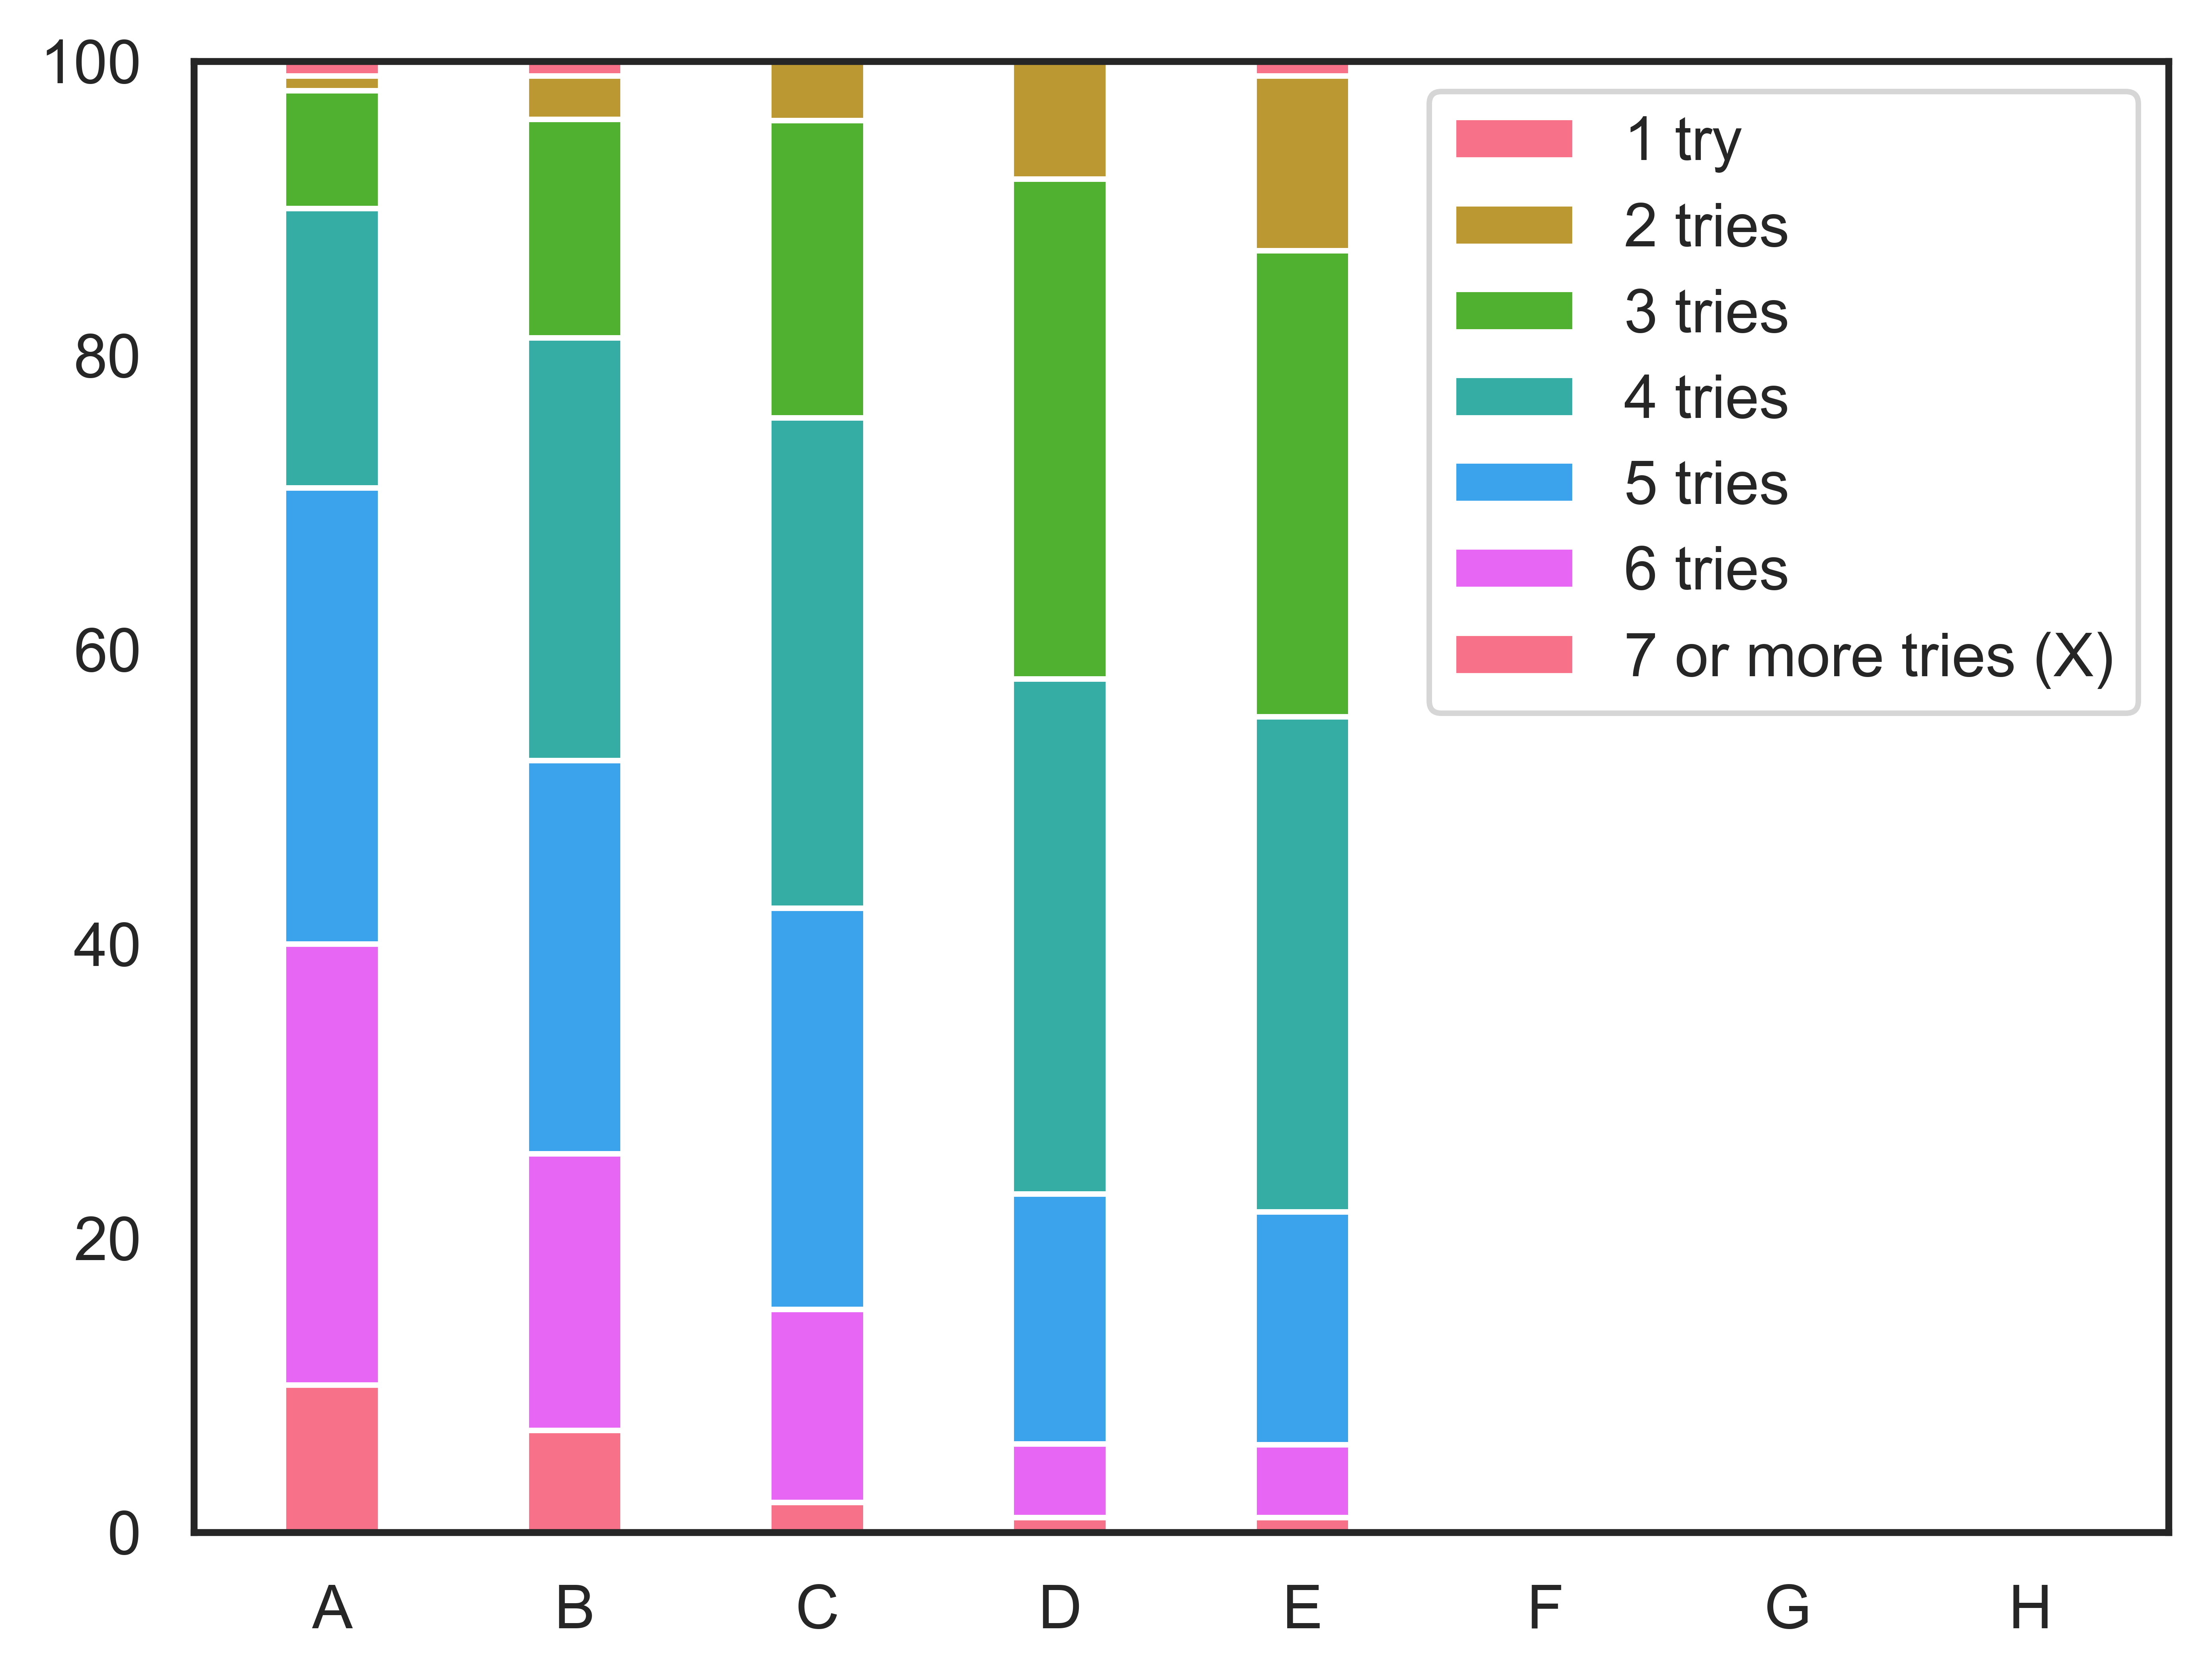

In [1070]:
import numpy as np

# sns.set_theme(style="white", palette="husl")
plt.figure(dpi=1000)

res = df.iloc[[308, 309, 279, 222, 115],:]
res = res.reset_index()
res.loc[len(res)] = 0
res.loc[len(res)] = 0
res.loc[len(res)] = 0
# x = np.array(res['percentage of hard mode'])
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

y1 = list(res['1 try'])
y2 = list(res['2 tries'])
y3 = list(res['3 tries'])
y4 = list(res['4 tries'])
y5 = list(res['5 tries'])
y6 = list(res['6 tries'])
y7 = list(res['7 or more tries (X)'])

total = np.array(res['percentage'])
total[5] = 100
total[6] = 100
total[7] = 100
y1_percent = np.divide(y1, total) * 100
y2_percent = np.divide(y2, total) * 100
y3_percent = np.divide(y3, total) * 100
y4_percent = np.divide(y4, total) * 100
y5_percent = np.divide(y5, total) * 100
y6_percent = np.divide(y6, total) * 100
y7_percent = np.divide(y7, total) * 100

width = 0.4
# fig, plt = plt.subplots()
# fig.figure(figsize=(12,10))
# plt.figure(dpi=1000)
plt.bar(labels, y1_percent, label='1 try', bottom=y2_percent+y3_percent+
       y4_percent+y5_percent+y6_percent+y7_percent, width=width)
plt.bar(labels, y2_percent, label='2 tries', bottom=y3_percent+
        y4_percent+y5_percent+y6_percent+y7_percent, width=width)
plt.bar(labels, y3_percent, label='3 tries', bottom=y4_percent+
       y5_percent+y6_percent+y7_percent, width=width)
plt.bar(labels, y4_percent, label='4 tries', bottom=y5_percent+
       y6_percent+y7_percent, width=width)
plt.bar(labels, y5_percent, label='5 tries', bottom=y6_percent+y7_percent, width=width)
plt.bar(labels, y6_percent, label='6 tries', bottom=y7_percent, width=width)
plt.bar(labels, y7_percent, label='7 or more tries (X)', width=width)



# 添加图例和标签
# plt.set_xlabel('Group')
# plt.set_ylabel('Percentage')
# plt.set_title('Percentage Stacked Bar Chart')
plt.legend(loc='best')
plt.show()

In [1084]:
def is_vowel(word, x):
    vowels = "aeiouAEIOU"
    if word[x] in vowels:
        return 1
    return 0

In [1085]:
for i in range(1,6):
    df[str(i) + " is vowel"] = df['Word'].apply(lambda x: is_vowel(x, i-1))


In [1086]:
# df["or_included"] = df["Word"].apply(lambda x: is_or_included(x))
# df["classic"] = df["Word"].apply(lambda x: is_included(x))

In [1087]:
# df.drop(columns=["Unnamed: 0", "Date", "Word", "Number in hard mode", "percentage of hard mode", 
#                 "percentage_pred", "percentage_proc", "percentage"], inplace=True)

In [773]:
# df_norm = (df - df.min()) / (df.max() - df.min())

In [774]:
# sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
# sns.pairplot(df, size=2)

In [1131]:
df.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'Unnamed: 13', 'percentage',
       'percentage of hard mode', 'percentage_pred', 'percentage_proc',
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'cl_included', 'cl_included1', '1 is vowel',
       '2 is vowel', '3 is vowel', '4 is vowel', '5 is vowel'],
      dtype='object')

In [1132]:
df.to_excel("data/用于问题23的数据.xlsx")

In [1133]:
df.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'Unnamed: 13', 'percentage',
       'percentage of hard mode', 'percentage_pred', 'percentage_proc',
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'cl_included', 'cl_included1', '1 is vowel',
       '2 is vowel', '3 is vowel', '4 is vowel', '5 is vowel'],
      dtype='object')

In [1152]:
X = df.loc[:, ['Contest number',
       'Number of  reported results', 
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'cl_included', '1 is vowel',
       '2 is vowel', '3 is vowel', '4 is vowel', '5 is vowel']]
y = df.loc[:, ['1 try','2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)']]

In [1180]:
X.shape

(351, 44)

In [1171]:
X_eerie = np.array([[620, 14836, 2, 4, 1, 8.564364327276781, 5, 0.09971195391262602,
                     0.09971195391262602, 0.07220355256841095, 0.05804128660585694,
                     0.09971195391262602, 0, 0, 0, 0, 3, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                     1, 1]])

In [1172]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [1173]:
# 将数据集分为训练集和测试集，比例为0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size=0.2, random_state=42)

In [1174]:
# 创建一个LinearRegression对象
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [1175]:
# 对测试集进行预测
y_pred = model.predict(X_test)

In [1176]:
X_eerie_scaled = scaler_X.transform(X_eerie)
y_eerie_scaled = model.predict(X_eerie_scaled)
y_eerie = scaler_y.inverse_transform(y_eerie_scaled)
y_eerie

/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.15800667,  5.11069914, 17.18976957, 30.3799978 , 27.53891137,
        15.23013172,  4.09816183]])

In [1177]:
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

r2 = r2_score(y_test, y_pred)
print("R方: ", r2)

MSE: 0.6462908559385383
MAE: 0.598003374423014
R方:  0.37000566845549515


In [1178]:
# 创建LightGBM模型
params = {'objective': 'regression', 
          'boosting' : 'gbdt',
          'max_depth': 5,
          'num_leaves': 16,
          'learning_rate': 0.1,
          'metric': 'rmse'}
model = lgb.LGBMRegressor(**params)
wrapper = MultiOutputRegressor(model)
# 训练模型
wrapper.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test[:, :-1], y_pred[:, :-1])
mae = mean_absolute_error(y_test[:, :-1], y_pred[:, :-1])

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
MSE: 0.6000674060342549
MAE: 0.562981533446059


In [1179]:
X_eerie_scaled = scaler_X.transform(X_eerie)
y_eerie_scaled = wrapper.predict(X_eerie_scaled)
y_eerie = scaler_y.inverse_transform(y_eerie_scaled)
y_eerie

/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.32399355,  7.22566183, 25.71362496, 30.50956539, 25.20174392,
        11.60023845,  1.85576689]])

In [709]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor

# 定义多个模型
models = [
    MultiOutputRegressor(LinearRegression()),
    MultiOutputRegressor(DecisionTreeRegressor()),
    MultiOutputRegressor(RandomForestRegressor(max_depth=4, random_state=42)),
    MLPRegressor(hidden_layer_sizes=(4,4),random_state=1, max_iter=1000)
]

# 对每个模型进行训练并预测测试集
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[:, :-1], y_pred[:, :-1])
    print(f"{model} MSE: {mse}")

MultiOutputRegressor(estimator=LinearRegression()) MSE: 0.6260179335099646
MultiOutputRegressor(estimator=DecisionTreeRegressor()) MSE: 1.2217759313780736
MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=4,
                                                     random_state=42)) MSE: 0.6916644696318673
MLPRegressor(hidden_layer_sizes=(4, 4), max_iter=1000, random_state=1) MSE: 0.7601428180501916


In [710]:
lr_pred = models[0].predict(X_test)
dt_pred = models[1].predict(X_test)
tf_pred = models[2].predict(X_test)
mlp_pred = models[3].predict(X_test)
a = 0.2
b = 0.2
c = 0.1
d = 1
ensemble_pred = (a*lr_pred + b*tf_pred + c*mlp_pred + d*mlp_pred) / (a + b + c + d)
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
print('Ensemble MSE:', ensemble_mse)

Ensemble MSE: 0.7064963769396491


In [711]:
pd.concat([pd.DataFrame(models[0].predict(X_train)),
                        pd.DataFrame(models[2].predict(X_train)),
                        pd.DataFrame(models[3].predict(X_train))],axis=1).shape

(280, 21)

In [589]:
models[0].predict(X_train).shape

(280, 7)

In [590]:
y_train.shape

(280, 7)

In [591]:
model_L2 = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model_L2.fit(pd.concat([pd.DataFrame(models[0].predict(X_train)),
                        pd.DataFrame(models[2].predict(X_train)),
                        pd.DataFrame(models[3].predict(X_train))],axis=1).values,y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [592]:
L2_pred = model_L2.predict(pd.concat([pd.DataFrame(models[0].predict(X_test)),
                        pd.DataFrame(models[2].predict(X_test)),
                        pd.DataFrame(models[3].predict(X_test))],axis=1).values)

In [593]:
L2_mse = mean_squared_error(y_test, L2_pred)
print('model L2 MSE:', L2_mse)

model L2 MSE: 0.6692581365108811


In [1210]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 定义GBDT回归模型
gbdt = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

wrapper = MultiOutputRegressor(gbdt)
# 训练模型
wrapper.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test[:, :-1], y_pred[:, :-1])
mae = mean_absolute_error(y_test[:, :-1], y_pred[:, :-1])

# 打印结果
print('MSE:', mse)
print('MAE:', mae)


MSE: 0.5849415289138525
MAE: 0.5620004789600855


In [543]:
y_pred[:,0].shape

(71,)

In [544]:
model = GradientBoostingRegressor(random_state=42)
wrapper = MultiOutputRegressor(model)

wrapper.fit(X_train, y_train)

y_pred = wrapper.predict(X_test)

# 计算均方误差
# 计算MSE和MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 打印结果
print('MSE:', mse)
print('MAE:', mae)

MSE: 0.62775007524996
MAE: 0.5606674690146576


/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/haddless/opt/anaconda3/envs/bd/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: Us

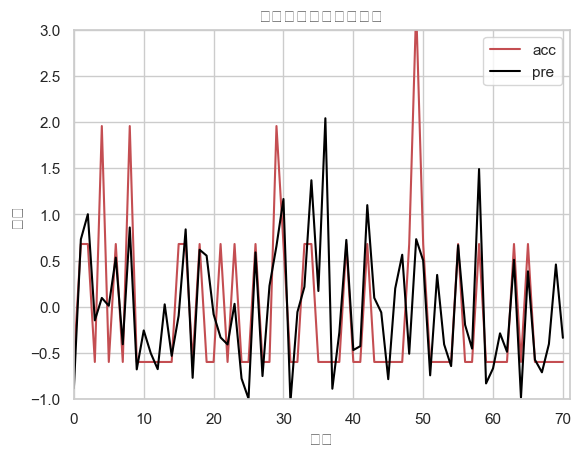

In [545]:
plt.plot(y_test[:,0],color="r",label="acc") #颜色表示
 
plt.plot(y_pred[:,0],color=(0,0,0),label="pre") 
 
plt.xlabel("个数") #x轴命名表示
 
plt.ylabel("价格") #y轴命名表示
 
plt.axis([0,71,-1,3])#设定x轴 y轴的范围
 
plt.title("实际值与预测值折线图") 
 
plt.legend()#增加图例
 
plt.show() #显示图片

In [1181]:
df.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'Unnamed: 13', 'percentage',
       'percentage of hard mode', 'percentage_pred', 'percentage_proc',
       'number of repeated letters', 'number of vowels',
       'number of common consonants', 'word commonness',
       'number of common letters', 'LetterFreq1', 'LetterFreq2', 'LetterFreq3',
       'LetterFreq4', 'LetterFreq5', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z', 'cl_included', 'cl_included1', '1 is vowel',
       '2 is vowel', '3 is vowel', '4 is vowel', '5 is vowel'],
      dtype='object')

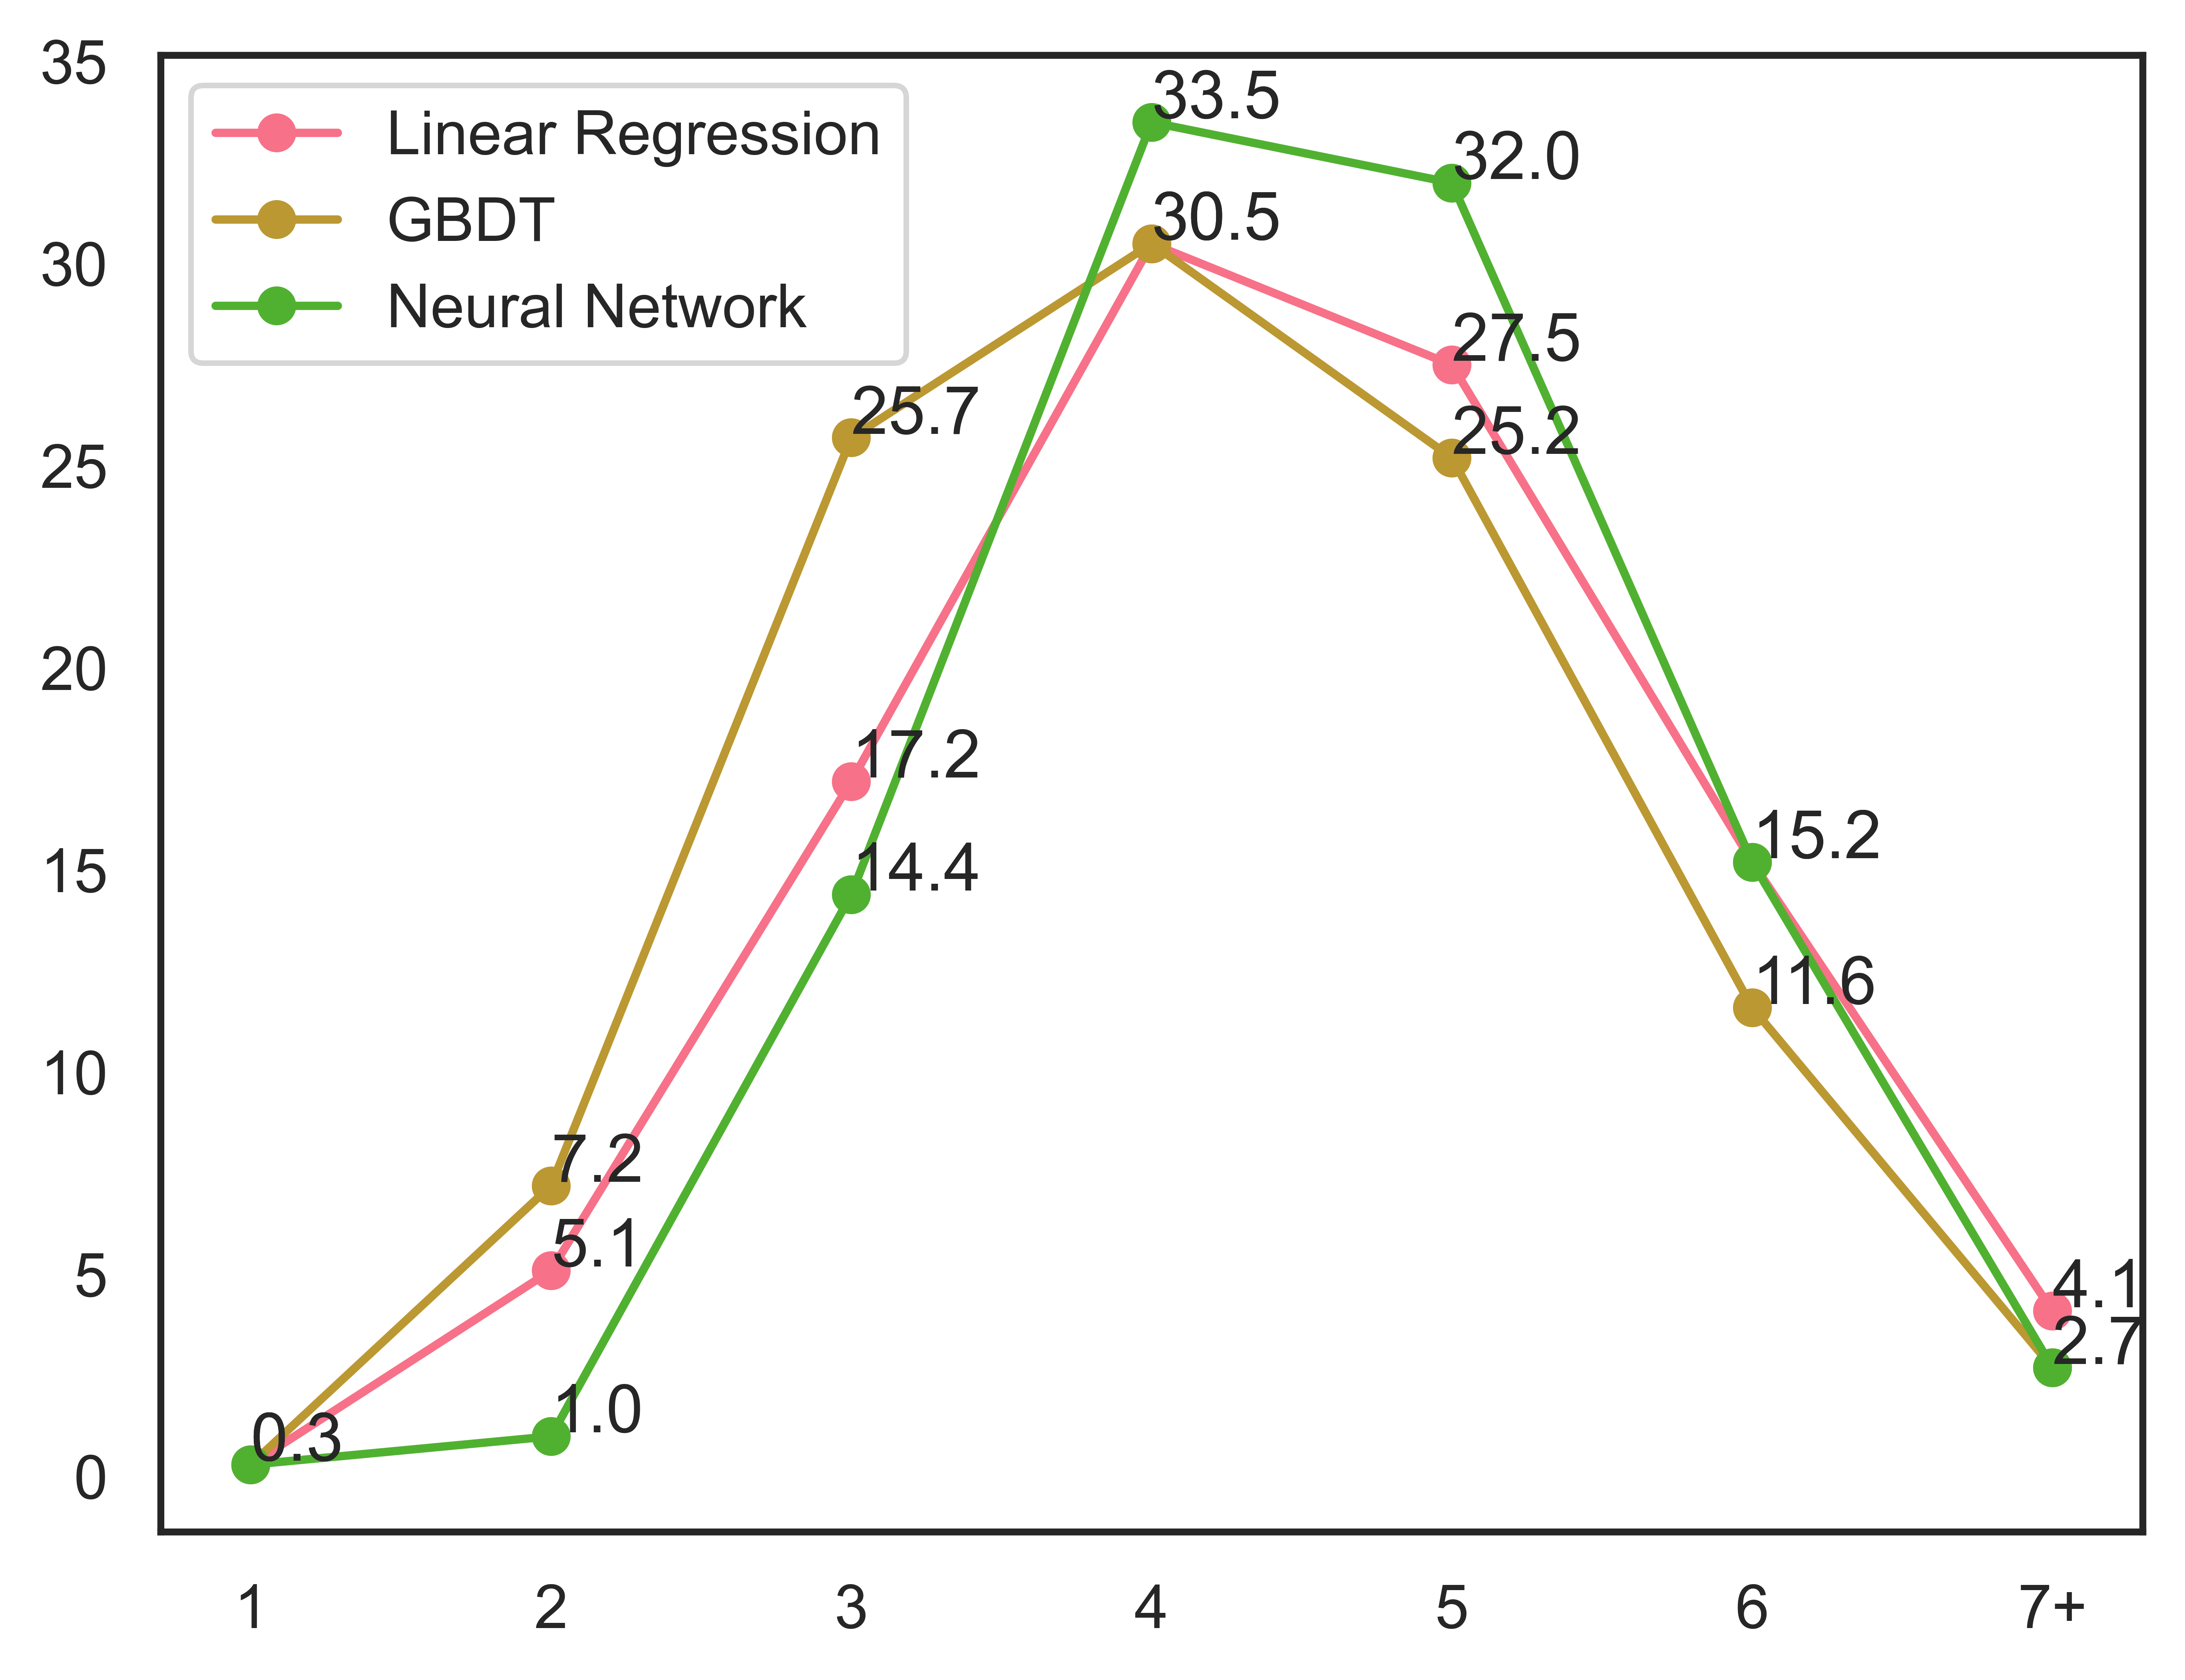

In [1205]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(dpi=1000)
# 创建示例数据框
df = pd.DataFrame({
    'category': ['1',
       '2', '3', '4', '5', '6',
       '7+'],
    'Linear Regression': [0.3,  5.1, 17.2, 30.5 , 27.5,
        15.2,  4.1],
    'GBDT': [0.3,  7.2, 25.7, 30.5, 25.2,
        11.6,  2.7],
    'Neural Network':[0.3, 1.0, 14.4, 33.5, 32.0, 15.2, 2.7]
})

# 创建子图
# fig, plt = plt.subplots()

# 绘制第一个连续变量的折线图
plt.plot(df['category'], df['Linear Regression'], marker='o', label='Linear Regression')
for i in range(df.shape[0]):
    plt.text(df['category'][i], df['Linear Regression'][i] + 0.1, df['Linear Regression'][i], fontsize=12)

# 绘制第二个连续变量的折线图
plt.plot(df['category'], df['GBDT'], marker='o', label='GBDT')
for i in range(df.shape[0]):
    plt.text(df['category'][i], df['GBDT'][i]+0.1, df['GBDT'][i], fontsize=12)

plt.plot(df['category'], df['Neural Network'], marker='o', label='Neural Network')
for i in range(df.shape[0]):
    plt.text(df['category'][i], df['Neural Network'][i] + 0.1, df['Neural Network'][i], fontsize=12)

# 添加图例和轴标签
plt.legend()

# 显示图形
plt.show()
